In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Employee DB.csv')

# Remove any rows with missing values
df.dropna(inplace=True)


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#Convert MonthlyIncome to YearlySalary 
df['Salary'] = df['MonthlyIncome'] * 12
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,30852
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,119892
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,73704
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,64680


In [5]:
# Select only the columns you need
df = df[['EmployeeNumber', 'Department', 'Gender', 'YearsAtCompany', 'Salary']]

# Display the first few rows to verify the selection
df


,EmployeeNumber,Department,Gender,YearsAtCompany,Salary
0,1,Sales,Female,6,71916
1,2,Research & Development,Male,10,61560
2,4,Research & Development,Male,0,25080
3,5,Research & Development,Female,8,34908
4,7,Research & Development,Male,2,41616
...,...,...,...,...,...
1465,2061,Research & Development,Male,5,30852
1466,2062,Research & Development,Male,7,119892
1467,2064,Research & Development,Male,6,73704
1468,2065,Sales,Male,9,64680


Question 1: What is the average salary of employees by department?

In [6]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean()
print(avg_salary_by_dept)


Department
Human Resources           79854.095238
Research & Development    75375.034339
Sales                     83510.071749
Name: Salary, dtype: float64


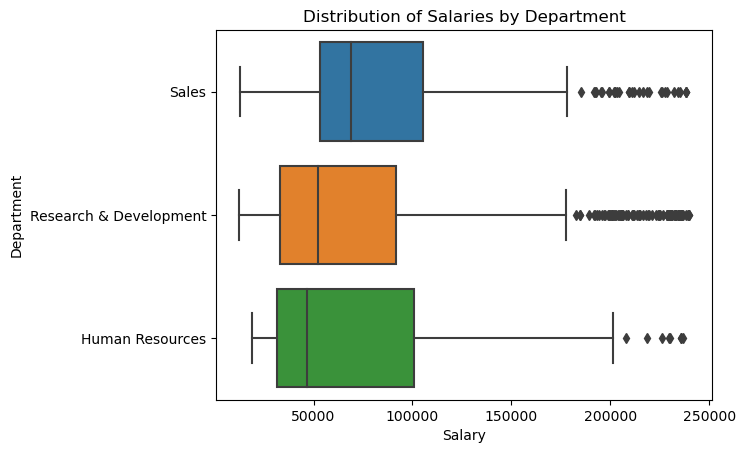

In [21]:
# Create the boxplot
sns.boxplot(x='Salary', y='Department', data=df)

# Set the title and axis labels
plt.title('Distribution of Salaries by Department')
plt.xlabel('Salary')
plt.ylabel('Department')
plt.savefig('Average Salaries by Department.jpg')
plt.show()


Question 2: Which department has the highest number of employees?

In [8]:
num_employees_by_dept = df.groupby('Department')['EmployeeNumber'].count().sort_values(ascending=False)
print(num_employees_by_dept)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: EmployeeNumber, dtype: int64


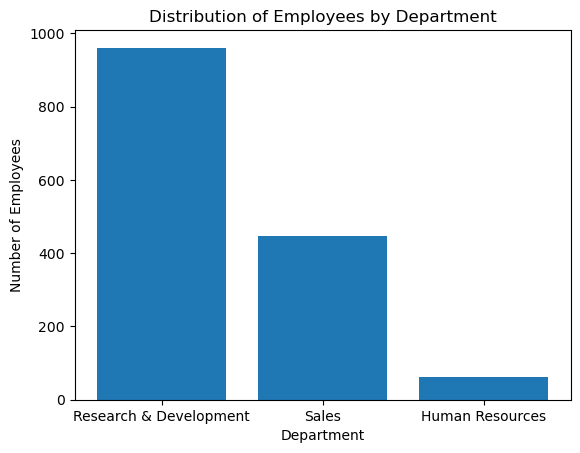

In [9]:
# Count the number of employees in each department
dept_counts = df['Department'].value_counts()

# Plot the result as a bar chart
plt.bar(dept_counts.index, dept_counts.values)
plt.title('Distribution of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.savefig('Number of Employees BarChart.jpg')
plt.show()

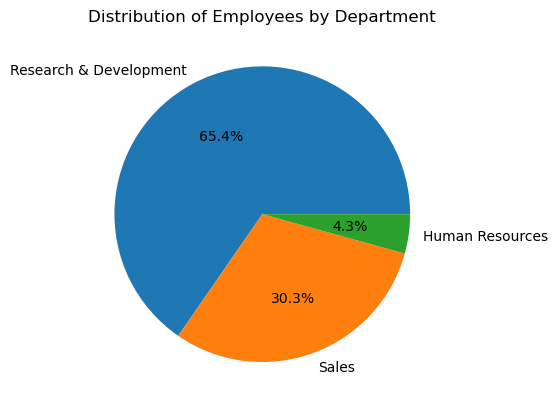

In [10]:
# Count the number of employees in each department
dept_counts = df['Department'].value_counts()

# Plot the result as a pie chart
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Employees by Department')
plt.savefig('Distribution of Employees by Department.jpg')
plt.show()

Question 3: What is the distribution of gender in the company?

In [11]:
gender_distribution = df.groupby('Gender')['EmployeeNumber'].count() / df['EmployeeNumber'].count() * 100
print(gender_distribution)

Gender
Female    40.0
Male      60.0
Name: EmployeeNumber, dtype: float64


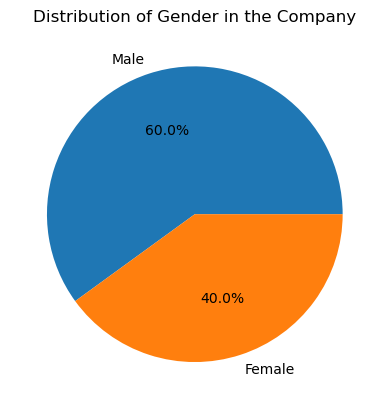

In [12]:
# Count the number of employees of each gender
gender_counts = df['Gender'].value_counts()

# Plot the result as a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Gender in the Company')
plt.savefig('Distribution of Gender in the Company.jpg')
plt.show()


Question 4: Is there a correlation between years of experience and salary?

In [13]:
correlation = df['YearsAtCompany'].corr(df['Salary'])
print(correlation)

0.5142848257331971


This indicates that there is a tendency for employees with more years of experience to earn higher salaries.

In [14]:
import statsmodels.api as sm

# Define the predictor variable (years of experience)
X = df['YearsAtCompany']

# Define the response variable (salary)
y = df['Salary']

# Add a constant to the predictor variable for intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     527.9
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          4.82e-100
Time:                        00:32:51   Log-Likelihood:                -17944.
No. Observations:                1470   AIC:                         3.589e+04
Df Residuals:                    1468   BIC:                         3.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            4.48e+04   1921.091     23.

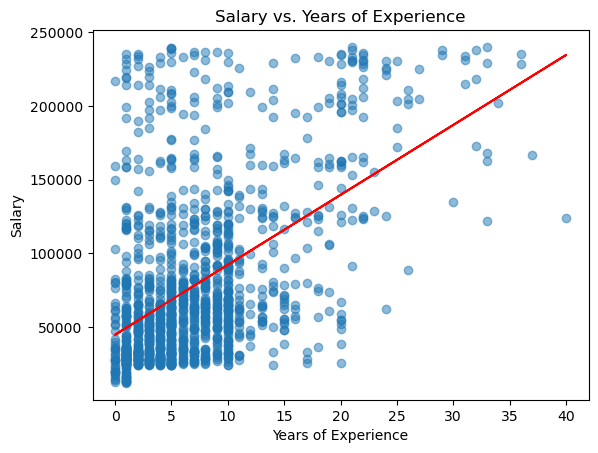

In [15]:
# Define the predictor variable (years of experience)
X = df['YearsAtCompany']

# Define the response variable (salary)
y = df['Salary']

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Create a scatter plot of the data
plt.scatter(X, y, alpha=0.5)

# Add the regression line to the plot
plt.plot(X, model.predict(sm.add_constant(X)), color='red')

# Set the plot title and axis labels
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Salary vs. Years of Experience.jpg')
plt.show()


Question 5:Which department has the highest average salary?

In [16]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_dept)


Department
Sales                     83510.071749
Human Resources           79854.095238
Research & Development    75375.034339
Name: Salary, dtype: float64


Sales has the highest Avg Salary

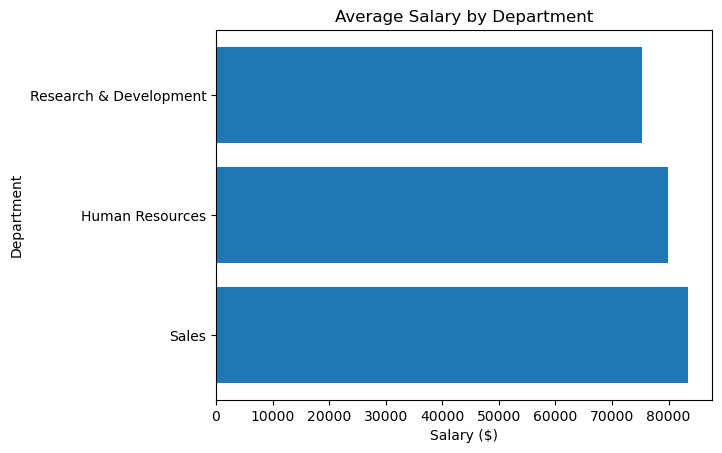

In [22]:
# Compute the average salary by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

# Plot the result as a horizontal bar chart
plt.barh(avg_salary_by_dept.index, avg_salary_by_dept.values)
plt.title('Average Salary by Department')
plt.xlabel('Salary ($)')
plt.ylabel('Department')
plt.savefig('Average Salary by Department.jpg')
plt.show()
